# Training and Tuning Random Forest

This notebook has two parts: Sample Codes and Practice. You can do the practice part for extra credits (Extra Credit 3). 

## 1. Sample Codes

**Installation**:  You will need to install python and jupyter.  The easiest way is to install the package `Anaconda` as follows. 

- Download Anaconda from [this link](https://www.anaconda.com/distribution/#download-section)
- Install Anaconda from the downloaded file
- Open Jupyter Lab by 

    - (1) Click to the Start Windows Logo and Type in Anconda Promp.  Open Anaconda Promp
    - (2) In Anaconda Promp, type in: `jupyter lab` and hit Enter

**Data**: The data should be in the same folder as the notebook.

A procedure of training and tuning predictive models runs as follows.

- Step 1: Import some packages
- Step 2: Import data and do some cleaning
- Step 3: Encode Categorical Variables, i.e. change a categorical variable to (multiple) numeric variables.
- Step 4: Split the data into training and testing
- Step 5: Train a first model 
- Step 6: Test the model
- Step 7: Hyperparameters Tuning and redo Step 5 and 6


We will go over the above steps to train random forest with the `titanic` dataset. Notice that these codes can be reused for other dataset. The codes for Step 1, 4, 5, and 6 should be the same or at least similar when applied to other data.  Only Step 2 and Step 3 will be different from data to data. 

### Step 1: Import some packages

In [1]:
import pandas as pd
import numpy as np
np.random.seed(12356)

### Step 2: Import data and do some cleaning

In [2]:
# Import the data
df = pd.read_csv('titanic.csv')

In [3]:
# See all variables of the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")

### Step 3: Encode Categorical Variables

Encode a Categorical Variable = Turn it into multiple numeric variables

`sklearn` does not work directly with categorical variables. It requires the categorical variables to be encoded into numeric variables. There are multiple way to encode categorical variables.  Here, we implement the simplest way of encoding: `one-hot` encoding or `dummy` encoding. 

In [5]:
# Show the types of the variables
X.dtypes

Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
SibSp         int64
Parch         int64
dtype: object

In [6]:
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)

### Step 4: Split the data into training and testing

`test_size =.3` means 30% of the data is saved for testing. 

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

### Step 5: Train a model

`n_estimators` is the number of trees in the forest.  `max_features` is the number of variables considered at each split.  

In [8]:
from sklearn.ensemble import RandomForestClassifier
r1 = RandomForestClassifier(n_estimators=10, max_features=2)
r1.fit(x_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=10)

### Step 6: Test the model

In [9]:
# Accuracry on test data
r1.score(x_test, y_test)

0.832089552238806

### Step 7: Hyperparameters Tuning and redo Step 5 and 6

How do we know the selection of the selected values of `n_estimators` and `max_features` above are the best selection? We actually do not know!

Tuning hyperparameters or Tuning a model is to search for the set of hyperparameters that works the best. To tune a model, one first needs to know what the hyperparameters/tuning parameters that the model has. A model may have several hyperparamters that sometime it is not practical to tune all the hyperparameters.

Our model here is random forest. To see the list of tuning parameters of random forest, one can check at the sklearn document of the model. One way to find out is to google: RandomForestClassifier and sklearn. This search brings us to this link.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

From the link, you can see the list of (hyper)parameters. In this example, we will tune hyperparameter `n_estimators` and `max_features` using grid search (`GridSearchCV`)

In [10]:
import warnings
warnings.filterwarnings("ignore")


# Decide what hyperparameter to tune then decide the searching range
param_grid = {'n_estimators': range(5,15), 'max_features':range(2, 5)}

# Create a list of trees
from sklearn.model_selection import GridSearchCV
r2 = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3)
r2.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(2, 5),
                         'n_estimators': range(5, 15)})

In [11]:
cv_result = pd.concat([pd.DataFrame(r2.cv_results_["params"]),pd.DataFrame(r2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv_result['Rank'] = (-cv_result['Accuracy']).argsort().argsort()
cv_result

,max_features,n_estimators,Accuracy,Rank
0,2,5,0.773659,24
1,2,6,0.789700,10
2,2,7,0.755992,28
3,2,8,0.791326,8
4,2,9,0.776864,22
5,2,10,0.772064,25
6,2,11,0.768828,26
7,2,12,0.780085,19
8,2,13,0.780062,20
9,2,14,0.802544,2


What are the best values for `n_estimators` and `max_features`?

In [12]:
r2.best_params_

{'max_features': 4, 'n_estimators': 8}

### Train and test the random forest with the best parameters found above

In [13]:
r3 = RandomForestClassifier(**r2.best_params_)
r3.fit(x_train, y_train)
r3.score(x_test, y_test)

0.8544776119402985

### Variable Importance 

<Axes: ylabel='Variables'>

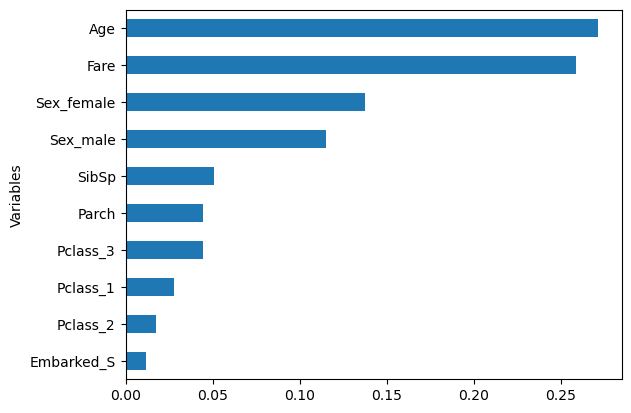

In [19]:
import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r3.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
dff = feature_importance[:10]
dff.sort_values('Importance',inplace=True)

dff.plot(kind='barh',y='Importance',x='Variables', legend=False)

## Training Errors vs. Testing Errors

We plot the accuracy of random forest when changing the number of trees.  The plot shows increasing the number of trees does not necessarily overfit the data (the testing accuracy does not decrease). 

<Axes: xlabel='n_estimators', ylabel='Accuracy'>

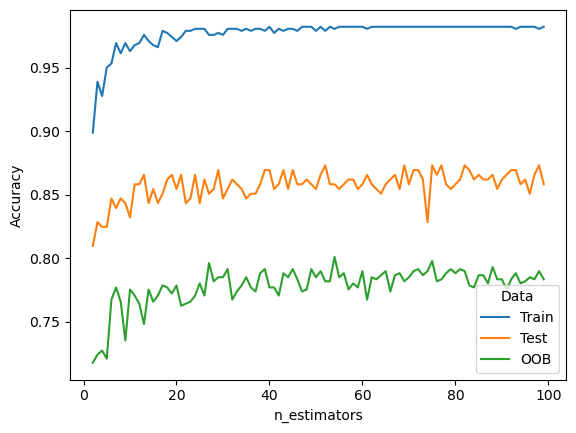

In [20]:
n_estimators = range(2, 100)
max_features = range(2, 3)

#erros_plot = function(criterion, )

rs = pd.DataFrame(columns = ['n_estimators','max_features', 'Data','Accuracy'])

for n_estimators1 in n_estimators:
    for max_features1 in max_features:
        r1 = RandomForestClassifier(n_estimators=n_estimators1, max_features=max_features1, oob_score=True)
        r1.fit(x_train, y_train)
        new_row={'n_estimators':n_estimators1,'max_features':max_features1, 'Data':'Train','Accuracy':r1.score(x_train, y_train)}
        
        #rs=rs.append(new_row, ignore_index=True)
        
        rs = pd.concat([rs, pd.DataFrame([new_row])], ignore_index=True)
        
        new_row={'n_estimators':n_estimators1,'max_features':max_features1, 'Data':'Test','Accuracy':r1.score(x_test, y_test)}
        #rs=rs.append(new_row, ignore_index=True)
        rs = pd.concat([rs, pd.DataFrame([new_row])], ignore_index=True)
        
        new_row={'n_estimators':n_estimators1,'max_features':max_features1, 'Data':'OOB','Accuracy':r1.oob_score_}
        #rs=rs.append(new_row, ignore_index=True)
        rs = pd.concat([rs, pd.DataFrame([new_row])], ignore_index=True)
        
        
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=rs, y="Accuracy", x="n_estimators", hue='Data', ci=None)     

## 2. Practice

Following the sample codes above to do/answer the below.  You can export the codes to html (File -> Export Notebook As... -> Export Notebook to html) and submit the html file to Canvas (Extra Credit 3) for extra credit. 

- Import the breast cancer dataset.  The data can be downloaded at [this link](https://bryantstats.github.io/math460/data/breast_cancer.csv)
- Check out the missing values in each columns
- Set the input (X) and output (y). Split the data into 70% training and 30% testing
- Train a random forest of 100 trees. Consider 3 variables at each split. What is the training accuracy and testing accuracy of the forest?
- Consider a collection of random forest where the number of trees run from 20 to 200 and the variable considered at each split runs from 3 to 10.  What is the best random forest in this collection in term of test accuracy? 
- Train a random forest using the best hyperparameters found above then calculate the testing error of this tree. 
- Find a better random forest than the one in the above question.